## Mental Health Effects of COVID

In [67]:
import pandas as pd
import os
from sodapy import Socrata
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

# cvs_output_file_path =  os.path.join("cvs_output.csv")

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cdc.gov", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cdc.gov,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("8pt5-q6wp", limit=2000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)
results_df

phase                        indicator              group          state  \
0        1  Symptoms of Depressive Disorder  National Estimate  United States   
1        1  Symptoms of Depressive Disorder             By Age  United States   
2        1  Symptoms of Depressive Disorder             By Age  United States   
3        1  Symptoms of Depressive Disorder             By Age  United States   
4        1  Symptoms of Depressive Disorder             By Age  United States   
...    ...                              ...                ...            ...   
1995     1     Symptoms of Anxiety Disorder           By State         Kansas   
1996     1     Symptoms of Anxiety Disorder           By State       Kentucky   
1997     1     Symptoms of Anxiety Disorder           By State      Louisiana   
1998     1     Symptoms of Anxiety Disorder           By State          Maine   
1999     1     Symptoms of Anxiety Disorder           By State       Maryland   

           subgroup time_period time_period_label value lowci highci  \
0     United States           1    Apr 23 - May 5  23.5  22.7   24.3   
1     18 - 29 years           1    Apr 23 - May 5  32.7  30.2   35.2   
2     30 - 39 years           1    Apr 23 - May 5  25.7  24.1   27.3   
3     40 - 49 years           1    Apr 23 - May 5  24.8  23.3   26.2   
4     50 - 59 years           1    Apr 23 - May 5  23.2  21.5     25   
...             ...         ...               ...   ...   ...    ...   
1995         Kansas          10   July 2 - July 7  32.3  28.2   36.6   
1996       Kentucky          10   July 2 - July 7  36.3  31.2   41.6   
1997      Louisiana          10   July 2 - July 7  38.6  34.2   43.1   
1998          Maine          10   July 2 - July 7  32.8    29   36.7   
1999       Maryland          10   July 2 - July 7  32.2  27.9   36.7   

     confidence_interval quartile_range  
0            22.7 - 24.3            NaN  
1            30.2 - 35.2            NaN  
2            24.1 - 27.3            NaN  
3            23.3 - 26.2            NaN  
4            21.5 - 25.0            NaN  
...                  ...            ...  
1995         28.2 - 36.6      31.4-32.9  
1996         31.2 - 41.6      35.4-40.6  
1997         34.2 - 43.1      35.4-40.6  
1998         29.0 - 36.7      31.4-32.9  
1999         27.9 - 36.7      31.4-32.9  

[2000 rows x 12 columns]

## Age DataFrames and plots

In [68]:
us_by_age_df = results_df.loc[(results_df["state"] == "United States") &
                              (results_df["group"] == "By Age")]
    
us_by_age_trim_df = us_by_age_df[['indicator', 'subgroup', 'time_period', 'time_period_label', 'value']].copy()
us_by_age_trim_df['value'] = us_by_age_df['value'].astype(float)
us_by_age_trim_df['time_period'] = us_by_age_df['time_period'].astype(int)
us_by_age_trim_df = us_by_age_trim_df.loc[((us_by_age_trim_df['subgroup'] == "18 - 29 years") |
                                           (us_by_age_trim_df['subgroup'] == "30 - 39 years"))]
pd.set_option('display.max_rows', 500)
us_by_age_trim_df

indicator       subgroup  \
1                       Symptoms of Depressive Disorder  18 - 29 years   
2                       Symptoms of Depressive Disorder  30 - 39 years   
71                         Symptoms of Anxiety Disorder  18 - 29 years   
72                         Symptoms of Anxiety Disorder  30 - 39 years   
141   Symptoms of Anxiety Disorder or Depressive Dis...  18 - 29 years   
142   Symptoms of Anxiety Disorder or Depressive Dis...  30 - 39 years   
211                     Symptoms of Depressive Disorder  18 - 29 years   
212                     Symptoms of Depressive Disorder  30 - 39 years   
281                        Symptoms of Anxiety Disorder  18 - 29 years   
282                        Symptoms of Anxiety Disorder  30 - 39 years   
351   Symptoms of Anxiety Disorder or Depressive Dis...  18 - 29 years   
352   Symptoms of Anxiety Disorder or Depressive Dis...  30 - 39 years   
421                     Symptoms of Depressive Disorder  18 - 29 years   
422                     Symptoms of Depressive Disorder  30 - 39 years   
491                        Symptoms of Anxiety Disorder  18 - 29 years   
492                        Symptoms of Anxiety Disorder  30 - 39 years   
561   Symptoms of Anxiety Disorder or Depressive Dis...  18 - 29 years   
562   Symptoms of Anxiety Disorder or Depressive Dis...  30 - 39 years   
631                     Symptoms of Depressive Disorder  18 - 29 years   
632                     Symptoms of Depressive Disorder  30 - 39 years   
701                        Symptoms of Anxiety Disorder  18 - 29 years   
702                        Symptoms of Anxiety Disorder  30 - 39 years   
771   Symptoms of Anxiety Disorder or Depressive Dis...  18 - 29 years   
772   Symptoms of Anxiety Disorder or Depressive Dis...  30 - 39 years   
841                     Symptoms of Depressive Disorder  18 - 29 years   
842                     Symptoms of Depressive Disorder  30 - 39 years   
911                        Symptoms of Anxiety Disorder  18 - 29 years   
912                        Symptoms of Anxiety Disorder  30 - 39 years   
981   Symptoms of Anxiety Disorder or Depressive Dis...  18 - 29 years   
982   Symptoms of Anxiety Disorder or Depressive Dis...  30 - 39 years   
1051                    Symptoms of Depressive Disorder  18 - 29 years   
1052                    Symptoms of Depressive Disorder  30 - 39 years   
1121                       Symptoms of Anxiety Disorder  18 - 29 years   
1122                       Symptoms of Anxiety Disorder  30 - 39 years   
1191  Symptoms of Anxiety Disorder or Depressive Dis...  18 - 29 years   
1192  Symptoms of Anxiety Disorder or Depressive Dis...  30 - 39 years   
1261                    Symptoms of Depressive Disorder  18 - 29 years   
1262                    Symptoms of Depressive Disorder  30 - 39 years   
1331                       Symptoms of Anxiety Disorder  18 - 29 years   
1332                       Symptoms of Anxiety Disorder  30 - 39 years   
1401  Symptoms of Anxiety Disorder or Depressive Dis...  18 - 29 years   
1402  Symptoms of Anxiety Disorder or Depressive Dis...  30 - 39 years   
1471                    Symptoms of Depressive Disorder  18 - 29 years   
1472                    Symptoms of Depressive Disorder  30 - 39 years   
1541                       Symptoms of Anxiety Disorder  18 - 29 years   
1542                       Symptoms of Anxiety Disorder  30 - 39 years   
1611  Symptoms of Anxiety Disorder or Depressive Dis...  18 - 29 years   
1612  Symptoms of Anxiety Disorder or Depressive Dis...  30 - 39 years   
1681                    Symptoms of Depressive Disorder  18 - 29 years   
1682                    Symptoms of Depressive Disorder  30 - 39 years   
1751                       Symptoms of Anxiety Disorder  18 - 29 years   
1752                       Symptoms of Anxiety Disorder  30 - 39 years   
1821  Symptoms of Anxiety Disorder or Depressive Dis...  18 - 29 years   
1822  Symptoms of Anxiety Disorder or Depressive D

In [69]:
time_period_labels = us_by_age_trim_df["time_period_label"].unique()
us_by_age_group = us_by_age_trim_df.groupby(["indicator", "time_period"])
us_by_age_mean_df = pd.DataFrame(us_by_age_group["value"].mean())
us_by_age_mean_df.reset_index(inplace = True) 
subgroup_col = []
time_period_label_col = []
for time_period in us_by_age_mean_df['time_period']:
    subgroup_col.append("average")
    time_period_label_col.append(time_period_labels[time_period-1])
us_by_age_mean_df['subgroup'] = subgroup_col  
us_by_age_mean_df['time_period_label'] = time_period_label_col
us_by_age_mean_df = us_by_age_mean_df[['indicator','subgroup','time_period','time_period_label','value']]
us_by_age_mean_df

indicator subgroup  time_period  \
0                        Symptoms of Anxiety Disorder  average            1   
1                        Symptoms of Anxiety Disorder  average            2   
2                        Symptoms of Anxiety Disorder  average            3   
3                        Symptoms of Anxiety Disorder  average            4   
4                        Symptoms of Anxiety Disorder  average            5   
5                        Symptoms of Anxiety Disorder  average            6   
6                        Symptoms of Anxiety Disorder  average            7   
7                        Symptoms of Anxiety Disorder  average            8   
8                        Symptoms of Anxiety Disorder  average            9   
9                        Symptoms of Anxiety Disorder  average           10   
10  Symptoms of Anxiety Disorder or Depressive Dis...  average            1   
11  Symptoms of Anxiety Disorder or Depressive Dis...  average            2   
12  Symptoms of Anxiety Disorder or Depressive Dis...  average            3   
13  Symptoms of Anxiety Disorder or Depressive Dis...  average            4   
14  Symptoms of Anxiety Disorder or Depressive Dis...  average            5   
15  Symptoms of Anxiety Disorder or Depressive Dis...  average            6   
16  Symptoms of Anxiety Disorder or Depressive Dis...  average            7   
17  Symptoms of Anxiety Disorder or Depressive Dis...  average            8   
18  Symptoms of Anxiety Disorder or Depressive Dis...  average            9   
19                    Symptoms of Depressive Disorder  average            1   
20                    Symptoms of Depressive Disorder  average            2   
21                    Symptoms of Depressive Disorder  average            3   
22                    Symptoms of Depressive Disorder  average            4   
23                    Symptoms of Depressive Disorder  average            5   
24                    Symptoms of Depressive Disorder  average            6   
25                    Symptoms of Depressive Disorder  average            7   
26                    Symptoms of Depressive Disorder  average            8   
27                    Symptoms of Depressive Disorder  average            9   
28                    Symptoms of Depressive Disorder  average           10   

    time_period_label  value  
0      Apr 23 - May 5  37.30  
1      May 7 - May 12  38.15  
2     May 14 - May 19  35.40  
3     May 21 - May 26  37.15  
4     May 28 - June 2  39.00  
5     June 4 - June 9  39.25  
6   June 11 - June 16  39.35  
7   June 18 - June 23  39.40  
8   June 25 - June 30  40.65  
9     July 2 - July 7  42.50  
10     Apr 23 - May 5  43.20  
11     May 7 - May 12  43.35  
12    May 14 - May 19  42.75  
13    May 21 - May 26  43.05  
14    May 28 - June 2  44.95  
15    June 4 - June 9  45.40  
16  June 11 - June 16  44.50  
17  June 18 - June 23  45.40  
18  June 25 - June 30  46.75  
19     Apr 23 - May 5  29.20  
20     May 7 - May 12  31.95  
21    May 14 - May 19  31.70  
22    May 21 - May 26  32.05  
23    May 28 - June 2  32.35  
24    June 4 - June 9  33.05  
25  June 11 - June 16  31.75  
26  June 18 - June 23  32.50  
27  June 25 - June 30  33.65  
28    July 2 - July 7  33.75

In [70]:
for i in range(len(us_by_age_mean_df)):
    us_by_age_trim_df = us_by_age_trim_df.append(us_by_age_mean_df.iloc[i])
us_by_age_trim_df.reset_index(inplace=True)    
us_by_age_trim_df

index                                          indicator       subgroup  \
0       1                    Symptoms of Depressive Disorder  18 - 29 years   
1       2                    Symptoms of Depressive Disorder  30 - 39 years   
2      71                       Symptoms of Anxiety Disorder  18 - 29 years   
3      72                       Symptoms of Anxiety Disorder  30 - 39 years   
4     141  Symptoms of Anxiety Disorder or Depressive Dis...  18 - 29 years   
5     142  Symptoms of Anxiety Disorder or Depressive Dis...  30 - 39 years   
6     211                    Symptoms of Depressive Disorder  18 - 29 years   
7     212                    Symptoms of Depressive Disorder  30 - 39 years   
8     281                       Symptoms of Anxiety Disorder  18 - 29 years   
9     282                       Symptoms of Anxiety Disorder  30 - 39 years   
10    351  Symptoms of Anxiety Disorder or Depressive Dis...  18 - 29 years   
11    352  Symptoms of Anxiety Disorder or Depressive Dis...  30 - 39 years   
12    421                    Symptoms of Depressive Disorder  18 - 29 years   
13    422                    Symptoms of Depressive Disorder  30 - 39 years   
14    491                       Symptoms of Anxiety Disorder  18 - 29 years   
15    492                       Symptoms of Anxiety Disorder  30 - 39 years   
16    561  Symptoms of Anxiety Disorder or Depressive Dis...  18 - 29 years   
17    562  Symptoms of Anxiety Disorder or Depressive Dis...  30 - 39 years   
18    631                    Symptoms of Depressive Disorder  18 - 29 years   
19    632                    Symptoms of Depressive Disorder  30 - 39 years   
20    701                       Symptoms of Anxiety Disorder  18 - 29 years   
21    702                       Symptoms of Anxiety Disorder  30 - 39 years   
22    771  Symptoms of Anxiety Disorder or Depressive Dis...  18 - 29 years   
23    772  Symptoms of Anxiety Disorder or Depressive Dis...  30 - 39 years   
24    841                    Symptoms of Depressive Disorder  18 - 29 years   
25    842                    Symptoms of Depressive Disorder  30 - 39 years   
26    911                       Symptoms of Anxiety Disorder  18 - 29 years   
27    912                       Symptoms of Anxiety Disorder  30 - 39 years   
28    981  Symptoms of Anxiety Disorder or Depressive Dis...  18 - 29 years   
29    982  Symptoms of Anxiety Disorder or Depressive Dis...  30 - 39 years   
30   1051                    Symptoms of Depressive Disorder  18 - 29 years   
31   1052                    Symptoms of Depressive Disorder  30 - 39 years   
32   1121                       Symptoms of Anxiety Disorder  18 - 29 years   
33   1122                       Symptoms of Anxiety Disorder  30 - 39 years   
34   1191  Symptoms of Anxiety Disorder or Depressive Dis...  18 - 29 years   
35   1192  Symptoms of Anxiety Disorder or Depressive Dis...  30 - 39 years   
36   1261                    Symptoms of Depressive Disorder  18 - 29 years   
37   1262                    Symptoms of Depressive Disorder  30 - 39 years   
38   1331                       Symptoms of Anxiety Disorder  18 - 29 years   
39   1332                       Symptoms of Anxiety Disorder  30 - 39 years   
40   1401  Symptoms of Anxiety Disorder or Depressive Dis...  18 - 29 years   
41   1402  Symptoms of Anxiety Disorder or Depressive Dis...  30 - 39 years   
42   1471                    Symptoms of Depressive Disorder  18 - 29 years   
43   1472                    Symptoms of Depressive Disorder  30 - 39 years   
44   1541                       Symptoms of Anxiety Disorder  18 - 29 years   
45   1542                       Symptoms of Anxiety Disorder  30 - 39 years   
46   1611  Symptoms of Anxiety Disorder or Depressive Dis...  18 - 29 years   
47   1612  Symptoms of Anxiety Disorder or Depressive Dis...  30 - 39 years   
48   1681                    Symptoms of Depressive Disorder  18 - 29 years   
49   1682                    Symptoms of Depressive Di

In [71]:
us_by_age_dep_df = us_by_age_trim_df.loc[(us_by_age_trim_df["indicator"] == "Symptoms of Depressive Disorder")]
us_by_age_dep_df

index                        indicator       subgroup  time_period  \
0       1  Symptoms of Depressive Disorder  18 - 29 years            1   
1       2  Symptoms of Depressive Disorder  30 - 39 years            1   
6     211  Symptoms of Depressive Disorder  18 - 29 years            2   
7     212  Symptoms of Depressive Disorder  30 - 39 years            2   
12    421  Symptoms of Depressive Disorder  18 - 29 years            3   
13    422  Symptoms of Depressive Disorder  30 - 39 years            3   
18    631  Symptoms of Depressive Disorder  18 - 29 years            4   
19    632  Symptoms of Depressive Disorder  30 - 39 years            4   
24    841  Symptoms of Depressive Disorder  18 - 29 years            5   
25    842  Symptoms of Depressive Disorder  30 - 39 years            5   
30   1051  Symptoms of Depressive Disorder  18 - 29 years            6   
31   1052  Symptoms of Depressive Disorder  30 - 39 years            6   
36   1261  Symptoms of Depressive Disorder  18 - 29 years            7   
37   1262  Symptoms of Depressive Disorder  30 - 39 years            7   
42   1471  Symptoms of Depressive Disorder  18 - 29 years            8   
43   1472  Symptoms of Depressive Disorder  30 - 39 years            8   
48   1681  Symptoms of Depressive Disorder  18 - 29 years            9   
49   1682  Symptoms of Depressive Disorder  30 - 39 years            9   
54   1891  Symptoms of Depressive Disorder  18 - 29 years           10   
55   1892  Symptoms of Depressive Disorder  30 - 39 years           10   
77     19  Symptoms of Depressive Disorder        average            1   
78     20  Symptoms of Depressive Disorder        average            2   
79     21  Symptoms of Depressive Disorder        average            3   
80     22  Symptoms of Depressive Disorder        average            4   
81     23  Symptoms of Depressive Disorder        average            5   
82     24  Symptoms of Depressive Disorder        average            6   
83     25  Symptoms of Depressive Disorder        average            7   
84     26  Symptoms of Depressive Disorder        average            8   
85     27  Symptoms of Depressive Disorder        average            9   
86     28  Symptoms of Depressive Disorder        average           10   

    time_period_label  value  
0      Apr 23 - May 5  32.70  
1      Apr 23 - May 5  25.70  
6      May 7 - May 12  36.20  
7      May 7 - May 12  27.70  
12    May 14 - May 19  36.70  
13    May 14 - May 19  26.70  
18    May 21 - May 26  36.70  
19    May 21 - May 26  27.40  
24    May 28 - June 2  36.80  
25    May 28 - June 2  27.90  
30    June 4 - June 9  37.00  
31    June 4 - June 9  29.10  
36  June 11 - June 16  36.80  
37  June 11 - June 16  26.70  
42  June 18 - June 23  36.70  
43  June 18 - June 23  28.30  
48  June 25 - June 30  36.60  
49  June 25 - June 30  30.70  
54    July 2 - July 7  35.80  
55    July 2 - July 7  31.70  
77     Apr 23 - May 5  29.20  
78     May 7 - May 12  31.95  
79    May 14 - May 19  31.70  
80    May 21 - May 26  32.05  
81    May 28 - June 2  32.35  
82    June 4 - June 9  33.05  
83  June 11 - June 16  31.75  
84  June 18 - June 23  32.50  
85  June 25 - June 30  33.65  
86    July 2 - July 7  33.75

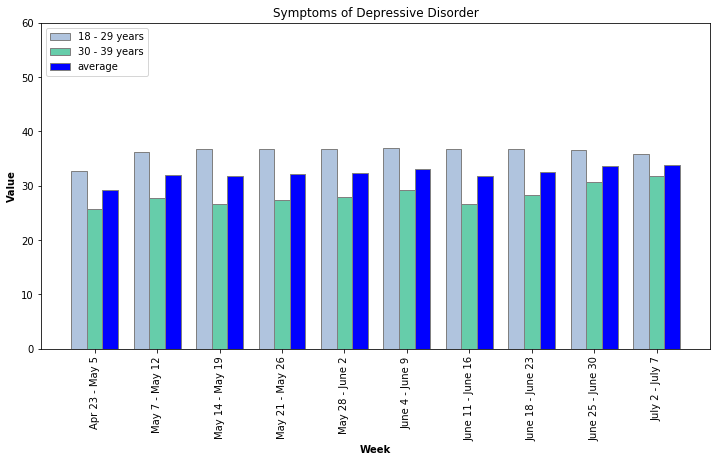

In [72]:
# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 6)) 

# set height of bar 
age_18_29_df = us_by_age_dep_df.loc[(us_by_age_dep_df["subgroup"] == "18 - 29 years")]
age_18_29 = age_18_29_df['value'].to_list()
time_periods_list = age_18_29_df['time_period_label'].to_list()
# print(age_18_29)

age_30_39_df = us_by_age_dep_df.loc[(us_by_age_dep_df["subgroup"] == "30 - 39 years")]
age_30_39 = age_30_39_df['value'].to_list()
# print(age_30_39)

age_avg_df = us_by_age_dep_df.loc[(us_by_age_dep_df["subgroup"] == "average")]
age_avg = age_avg_df['value'].to_list()
# print(age_avg)
   
# # Set position of bar on X axis 
br1 = np.arange(len(time_periods_list)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
   
# # Make the plot 
plt.bar(br1, age_18_29, color ='lightsteelblue', width = barWidth, 
        edgecolor ='grey', label ='18 - 29 years') 
plt.bar(br2, age_30_39, color ='mediumaquamarine', width = barWidth, 
        edgecolor ='grey', label ='30 - 39 years') 
plt.bar(br3, age_avg, color ='b', width = barWidth, 
        edgecolor ='grey', label ='average') 
   
# # Adding Xticks  
plt.title("Symptoms of Depressive Disorder")
plt.xlabel('Week', fontweight ='bold') 
plt.ylabel('Value', fontweight ='bold') 
plt.xticks([r + barWidth for r in range(len(age_18_29))], time_periods_list, rotation=90)
plt.ylim(0,60)
plt.legend(loc = "upper left")
plt.savefig('depr_by_age.png', bbox_inches = "tight")
plt.show()

In [73]:
us_by_age_anx_df = us_by_age_trim_df.loc[(us_by_age_trim_df["indicator"] == "Symptoms of Anxiety Disorder")]
us_by_age_anx_df

index                     indicator       subgroup  time_period  \
2      71  Symptoms of Anxiety Disorder  18 - 29 years            1   
3      72  Symptoms of Anxiety Disorder  30 - 39 years            1   
8     281  Symptoms of Anxiety Disorder  18 - 29 years            2   
9     282  Symptoms of Anxiety Disorder  30 - 39 years            2   
14    491  Symptoms of Anxiety Disorder  18 - 29 years            3   
15    492  Symptoms of Anxiety Disorder  30 - 39 years            3   
20    701  Symptoms of Anxiety Disorder  18 - 29 years            4   
21    702  Symptoms of Anxiety Disorder  30 - 39 years            4   
26    911  Symptoms of Anxiety Disorder  18 - 29 years            5   
27    912  Symptoms of Anxiety Disorder  30 - 39 years            5   
32   1121  Symptoms of Anxiety Disorder  18 - 29 years            6   
33   1122  Symptoms of Anxiety Disorder  30 - 39 years            6   
38   1331  Symptoms of Anxiety Disorder  18 - 29 years            7   
39   1332  Symptoms of Anxiety Disorder  30 - 39 years            7   
44   1541  Symptoms of Anxiety Disorder  18 - 29 years            8   
45   1542  Symptoms of Anxiety Disorder  30 - 39 years            8   
50   1751  Symptoms of Anxiety Disorder  18 - 29 years            9   
51   1752  Symptoms of Anxiety Disorder  30 - 39 years            9   
56   1961  Symptoms of Anxiety Disorder  18 - 29 years           10   
57   1962  Symptoms of Anxiety Disorder  30 - 39 years           10   
58      0  Symptoms of Anxiety Disorder        average            1   
59      1  Symptoms of Anxiety Disorder        average            2   
60      2  Symptoms of Anxiety Disorder        average            3   
61      3  Symptoms of Anxiety Disorder        average            4   
62      4  Symptoms of Anxiety Disorder        average            5   
63      5  Symptoms of Anxiety Disorder        average            6   
64      6  Symptoms of Anxiety Disorder        average            7   
65      7  Symptoms of Anxiety Disorder        average            8   
66      8  Symptoms of Anxiety Disorder        average            9   
67      9  Symptoms of Anxiety Disorder        average           10   

    time_period_label  value  
2      Apr 23 - May 5  40.20  
3      Apr 23 - May 5  34.40  
8      May 7 - May 12  42.00  
9      May 7 - May 12  34.30  
14    May 14 - May 19  38.60  
15    May 14 - May 19  32.20  
20    May 21 - May 26  39.10  
21    May 21 - May 26  35.20  
26    May 28 - June 2  42.20  
27    May 28 - June 2  35.80  
32    June 4 - June 9  41.70  
33    June 4 - June 9  36.80  
38  June 11 - June 16  42.90  
39  June 11 - June 16  35.80  
44  June 18 - June 23  42.80  
45  June 18 - June 23  36.00  
50  June 25 - June 30  42.40  
51  June 25 - June 30  38.90  
56    July 2 - July 7  44.40  
57    July 2 - July 7  40.60  
58     Apr 23 - May 5  37.30  
59     May 7 - May 12  38.15  
60    May 14 - May 19  35.40  
61    May 21 - May 26  37.15  
62    May 28 - June 2  39.00  
63    June 4 - June 9  39.25  
64  June 11 - June 16  39.35  
65  June 18 - June 23  39.40  
66  June 25 - June 30  40.65  
67    July 2 - July 7  42.50

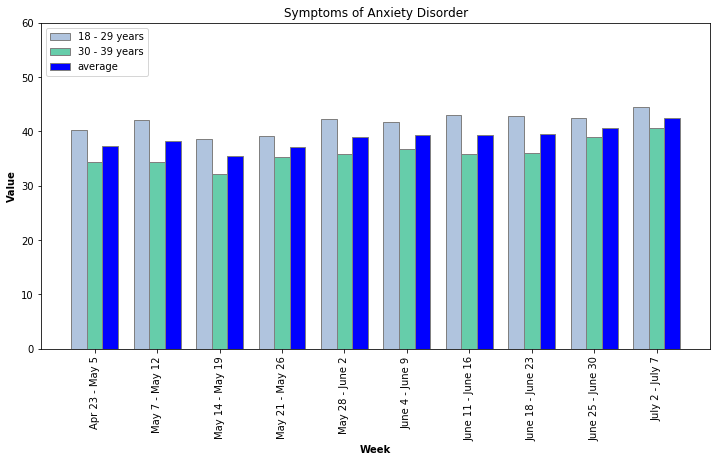

In [74]:
# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 6)) 

# set height of bar 
age_18_29_df = us_by_age_anx_df.loc[(us_by_age_anx_df["subgroup"] == "18 - 29 years")]
age_18_29 = age_18_29_df['value'].to_list()
time_periods_list = age_18_29_df['time_period_label'].to_list()
# print(age_18_29)

age_30_39_df = us_by_age_anx_df.loc[(us_by_age_anx_df["subgroup"] == "30 - 39 years")]
age_30_39 = age_30_39_df['value'].to_list()
# print(age_30_39)

age_avg_df = us_by_age_anx_df.loc[(us_by_age_anx_df["subgroup"] == "average")]
age_avg = age_avg_df['value'].to_list()
# print(age_avg)
   
# # Set position of bar on X axis 
br1 = np.arange(len(time_periods_list)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
   
# # Make the plot 
plt.bar(br1, age_18_29, color ='lightsteelblue', width = barWidth, 
        edgecolor ='grey', label ='18 - 29 years') 
plt.bar(br2, age_30_39, color ='mediumaquamarine', width = barWidth, 
        edgecolor ='grey', label ='30 - 39 years') 
plt.bar(br3, age_avg, color ='b', width = barWidth, 
        edgecolor ='grey', label ='average') 
   
# # Adding Xticks  
plt.title("Symptoms of Anxiety Disorder")
plt.xlabel('Week', fontweight ='bold') 
plt.ylabel('Value', fontweight ='bold') 
plt.xticks([r + barWidth for r in range(len(age_18_29))], time_periods_list, rotation=90)
plt.ylim(0,60)
plt.legend(loc = "upper left")
plt.savefig('anx_by_age.png', bbox_inches = "tight")   
plt.show()

In [75]:
us_by_age_anx_or_dep_df = us_by_age_trim_df.loc[(us_by_age_trim_df["indicator"] == 
                                                 "Symptoms of Anxiety Disorder or Depressive Disorder")]
us_by_age_anx_or_dep_df = us_by_age_anx_or_dep_df.sort_values(["subgroup", "time_period"], ascending = True)
us_by_age_anx_or_dep_df

index                                          indicator       subgroup  \
4     141  Symptoms of Anxiety Disorder or Depressive Dis...  18 - 29 years   
10    351  Symptoms of Anxiety Disorder or Depressive Dis...  18 - 29 years   
16    561  Symptoms of Anxiety Disorder or Depressive Dis...  18 - 29 years   
22    771  Symptoms of Anxiety Disorder or Depressive Dis...  18 - 29 years   
28    981  Symptoms of Anxiety Disorder or Depressive Dis...  18 - 29 years   
34   1191  Symptoms of Anxiety Disorder or Depressive Dis...  18 - 29 years   
40   1401  Symptoms of Anxiety Disorder or Depressive Dis...  18 - 29 years   
46   1611  Symptoms of Anxiety Disorder or Depressive Dis...  18 - 29 years   
52   1821  Symptoms of Anxiety Disorder or Depressive Dis...  18 - 29 years   
5     142  Symptoms of Anxiety Disorder or Depressive Dis...  30 - 39 years   
11    352  Symptoms of Anxiety Disorder or Depressive Dis...  30 - 39 years   
17    562  Symptoms of Anxiety Disorder or Depressive Dis...  30 - 39 years   
23    772  Symptoms of Anxiety Disorder or Depressive Dis...  30 - 39 years   
29    982  Symptoms of Anxiety Disorder or Depressive Dis...  30 - 39 years   
35   1192  Symptoms of Anxiety Disorder or Depressive Dis...  30 - 39 years   
41   1402  Symptoms of Anxiety Disorder or Depressive Dis...  30 - 39 years   
47   1612  Symptoms of Anxiety Disorder or Depressive Dis...  30 - 39 years   
53   1822  Symptoms of Anxiety Disorder or Depressive Dis...  30 - 39 years   
68     10  Symptoms of Anxiety Disorder or Depressive Dis...        average   
69     11  Symptoms of Anxiety Disorder or Depressive Dis...        average   
70     12  Symptoms of Anxiety Disorder or Depressive Dis...        average   
71     13  Symptoms of Anxiety Disorder or Depressive Dis...        average   
72     14  Symptoms of Anxiety Disorder or Depressive Dis...        average   
73     15  Symptoms of Anxiety Disorder or Depressive Dis...        average   
74     16  Symptoms of Anxiety Disorder or Depressive Dis...        average   
75     17  Symptoms of Anxiety Disorder or Depressive Dis...        average   
76     18  Symptoms of Anxiety Disorder or Depressive Dis...        average   

    time_period  time_period_label  value  
4             1     Apr 23 - May 5  46.80  
10            2     May 7 - May 12  47.40  
16            3    May 14 - May 19  47.70  
22            4    May 21 - May 26  46.60  
28            5    May 28 - June 2  49.30  
34            6    June 4 - June 9  49.30  
40            7  June 11 - June 16  48.70  
46            8  June 18 - June 23  50.00  
52            9  June 25 - June 30  49.40  
5             1     Apr 23 - May 5  39.60  
11            2     May 7 - May 12  39.30  
17            3    May 14 - May 19  37.80  
23            4    May 21 - May 26  39.50  
29            5    May 28 - June 2  40.60  
35            6    June 4 - June 9  41.50  
41            7  June 11 - June 16  40.30  
47            8  June 18 - June 23  40.80  
53            9  June 25 - June 30  44.10  
68            1     Apr 23 - May 5  43.20  
69            2     May 7 - May 12  43.35  
70            3    May 14 - May 19  42.75  
71            4    May 21 - May 26  43.05  
72            5    May 28 - June 2  44.95  
73            6    June 4 - June 9  45.40  
74            7  June 11 - June 16  44.50  
75            8  June 18 - June 23  45.40  
76            9  June 25 - June 30  46.75

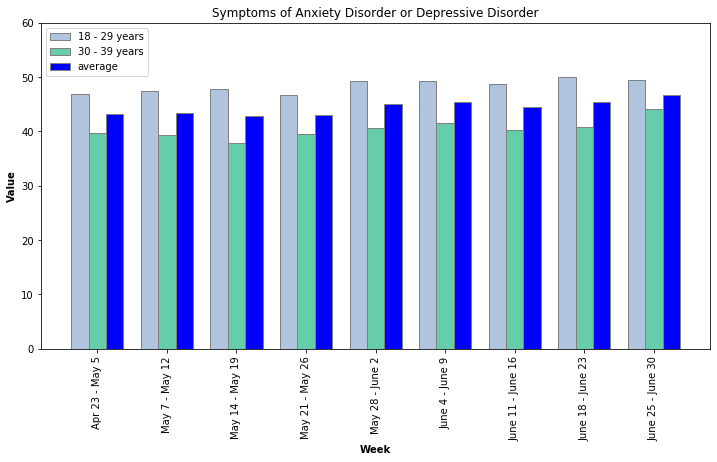

In [76]:
# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 6)) 

# set height of bar 
age_18_29_df = us_by_age_anx_or_dep_df.loc[(us_by_age_anx_or_dep_df["subgroup"] == "18 - 29 years")]
age_18_29 = age_18_29_df['value'].to_list()
time_periods_list = age_18_29_df['time_period_label'].to_list()
# print(age_18_29)

age_30_39_df = us_by_age_anx_or_dep_df.loc[(us_by_age_anx_or_dep_df["subgroup"] == "30 - 39 years")]
age_30_39 = age_30_39_df['value'].to_list()
# print(age_30_39)

age_avg_df = us_by_age_anx_or_dep_df.loc[(us_by_age_anx_or_dep_df["subgroup"] == "average")]
age_avg = age_avg_df['value'].to_list()
# print(age_avg)
   
# # Set position of bar on X axis 
br1 = np.arange(len(time_periods_list)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
   
# # Make the plot 
plt.bar(br1, age_18_29, color ='lightsteelblue', width = barWidth, 
        edgecolor ='grey', label ='18 - 29 years') 
plt.bar(br2, age_30_39, color ='mediumaquamarine', width = barWidth, 
        edgecolor ='grey', label ='30 - 39 years') 
plt.bar(br3, age_avg, color ='b', width = barWidth, 
        edgecolor ='grey', label ='average') 
   
# # Adding Xticks  
plt.title("Symptoms of Anxiety Disorder or Depressive Disorder")
plt.xlabel('Week', fontweight ='bold') 
plt.ylabel('Value', fontweight ='bold') 
plt.xticks([r + barWidth for r in range(len(age_18_29))], time_periods_list, rotation=90)
plt.ylim(0,60)
plt.legend(loc = "upper left")
plt.savefig('anx_or_depr_by_age.png', bbox_inches = "tight")   
plt.show()

## KS & MO / National DataFrames and plots

In [85]:
kansas_df = results_df.loc[results_df["state"] == "Kansas", :]
kansas_df['indicator'].value_counts()
kansas_df

missouri_df=results_df.loc[results_df['state']=='Missouri']
missouri_df

ks_mo=pd.merge(kansas_df,missouri_df, how='outer')
ks_mo

cleaned_KsMo=ks_mo[['indicator','state','time_period','value']].copy()
cleaned_KsMo

cleaned_KsMo['value']=cleaned_KsMo['value'].astype(float)
cleaned_KsMo['time_period'] = cleaned_KsMo['time_period'].astype(int)

cleaned=cleaned_KsMo.groupby(['time_period','indicator'])
cleaned.count().head(10)

state_mean=cleaned['value'].mean()
final=pd.DataFrame({'KS & MO Average(%)':state_mean})
final.head()


KS & MO Average(%)
time_period indicator                                                             
1           Symptoms of Anxiety Disorder                                     28.40
            Symptoms of Anxiety Disorder or Depressive Diso...               33.85
            Symptoms of Depressive Disorder                                  21.55
2           Symptoms of Anxiety Disorder                                     31.45
            Symptoms of Anxiety Disorder or Depressive Diso...               34.65

In [102]:
#chart for kansas 
new_name_df= results_df[["indicator", "state", "time_period","value"]].copy()
new_name_df 

indicator          state time_period value
0     Symptoms of Depressive Disorder  United States           1  23.5
1     Symptoms of Depressive Disorder  United States           1  32.7
2     Symptoms of Depressive Disorder  United States           1  25.7
3     Symptoms of Depressive Disorder  United States           1  24.8
4     Symptoms of Depressive Disorder  United States           1  23.2
...                               ...            ...         ...   ...
1995     Symptoms of Anxiety Disorder         Kansas          10  32.3
1996     Symptoms of Anxiety Disorder       Kentucky          10  36.3
1997     Symptoms of Anxiety Disorder      Louisiana          10  38.6
1998     Symptoms of Anxiety Disorder          Maine          10  32.8
1999     Symptoms of Anxiety Disorder       Maryland          10  32.2

[2000 rows x 4 columns]

In [104]:
#kansas_df.dtypes
kansas_df["time_period"]
ks_wks= kansas_df.groupby("indicator")["time_period"].count()
ks_wks

indicator
Symptoms of Anxiety Disorder                           10
Symptoms of Anxiety Disorder or Depressive Disorder     9
Symptoms of Depressive Disorder                        10
Name: time_period, dtype: int64

C:\Users\dhire\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


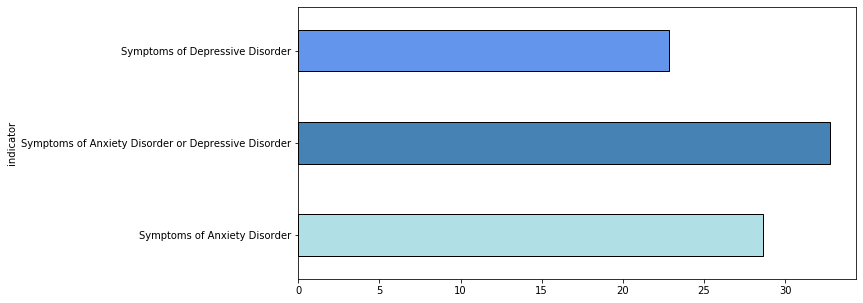

In [106]:
#chart for Kansas %'s' after ten weeks
kansas_df['value'] = kansas_df['value'].astype(float)
ks_wks= kansas_df.groupby("indicator")["value"].mean()

kansas_df.groupby("indicator")["value"].mean()
ks_wks = kansas_df.groupby("indicator")["value"].mean()
ks_wks

ks_wks.plot(kind="barh",width = (.45),figsize=(10, 5), color=["powderblue","steelblue","cornflowerblue"], edgeColor=('black'), linestyle='-')


In [107]:
#chart for mo
Mo_df = new_name_df.loc[(new_name_df["state"]=='Missouri')]
#kansas_df[['indicator', 'week']].value_counts()
Mo_df

indicator     state time_period  \
44                      Symptoms of Depressive Disorder  Missouri           1   
114                        Symptoms of Anxiety Disorder  Missouri           1   
184   Symptoms of Anxiety Disorder or Depressive Dis...  Missouri           1   
254                     Symptoms of Depressive Disorder  Missouri           2   
324                        Symptoms of Anxiety Disorder  Missouri           2   
394   Symptoms of Anxiety Disorder or Depressive Dis...  Missouri           2   
464                     Symptoms of Depressive Disorder  Missouri           3   
534                        Symptoms of Anxiety Disorder  Missouri           3   
604   Symptoms of Anxiety Disorder or Depressive Dis...  Missouri           3   
674                     Symptoms of Depressive Disorder  Missouri           4   
744                        Symptoms of Anxiety Disorder  Missouri           4   
814   Symptoms of Anxiety Disorder or Depressive Dis...  Missouri           4   
884                     Symptoms of Depressive Disorder  Missouri           5   
954                        Symptoms of Anxiety Disorder  Missouri           5   
1024  Symptoms of Anxiety Disorder or Depressive Dis...  Missouri           5   
1094                    Symptoms of Depressive Disorder  Missouri           6   
1164                       Symptoms of Anxiety Disorder  Missouri           6   
1234  Symptoms of Anxiety Disorder or Depressive Dis...  Missouri           6   
1304                    Symptoms of Depressive Disorder  Missouri           7   
1374                       Symptoms of Anxiety Disorder  Missouri           7   
1444  Symptoms of Anxiety Disorder or Depressive Dis...  Missouri           7   
1514                    Symptoms of Depressive Disorder  Missouri           8   
1584                       Symptoms of Anxiety Disorder  Missouri           8   
1654  Symptoms of Anxiety Disorder or Depressive Dis...  Missouri           8   
1724                    Symptoms of Depressive Disorder  Missouri           9   
1794                       Symptoms of Anxiety Disorder  Missouri           9   
1864  Symptoms of Anxiety Disorder or Depressive Dis...  Missouri           9   
1934                    Symptoms of Depressive Disorder  Missouri          10   

     value  
44      21  
114   30.4  
184   35.2  
254   24.1  
324   37.8  
394   41.3  
464   24.3  
534   30.4  
604   35.4  
674   24.3  
744     29  
814   32.9  
884   24.5  
954   30.1  
1024  33.7  
1094  23.1  
1164  23.2  
1234  29.5  
1304  26.1  
1374  33.3  
1444  36.5  
1514    25  
1584  28.3  
1654  32.9  
1724  25.6  
1794  32.2  
1864  35.8  
1934  28.8

In [108]:
#mo_df.dtypes
Mo_df["time_period"]
mo_wks= Mo_df.groupby("indicator")["time_period"].count()
mo_wks

indicator
Symptoms of Anxiety Disorder                            9
Symptoms of Anxiety Disorder or Depressive Disorder     9
Symptoms of Depressive Disorder                        10
Name: time_period, dtype: int64

C:\Users\dhire\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


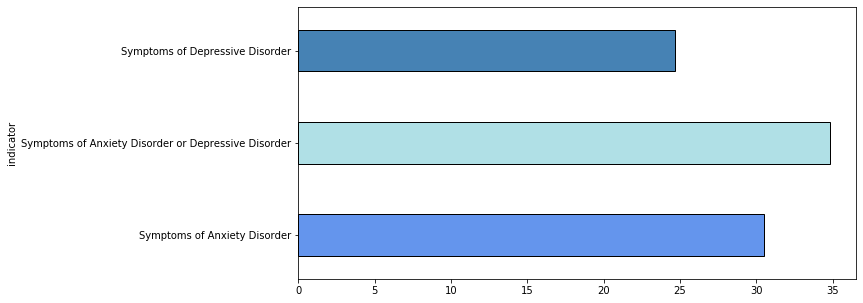

In [109]:
#chart for Mo %'s' after ten weeks
Mo_df['value'] = Mo_df['value'].astype(float)
mo_wks= Mo_df.groupby("indicator")["value"].mean()

Mo_df.groupby("indicator")["value"].mean()
mo_wks = Mo_df.groupby("indicator")["value"].mean()
mo_wks

mo_wks.plot(kind="barh",width = (.45),figsize=(10, 5), color=["cornflowerblue","powderblue","steelblue"],
            edgeColor=('black'), linestyle='-')


In [110]:
all_states=results_df.loc[(results_df['state']=='United States')]
all_states

cleaned_all_states=all_states[['indicator','state','time_period', 'value']].copy()
cleaned_all_states

indicator          state time_period value
0     Symptoms of Depressive Disorder  United States           1  23.5
1     Symptoms of Depressive Disorder  United States           1  32.7
2     Symptoms of Depressive Disorder  United States           1  25.7
3     Symptoms of Depressive Disorder  United States           1  24.8
4     Symptoms of Depressive Disorder  United States           1  23.2
...                               ...            ...         ...   ...
1974     Symptoms of Anxiety Disorder  United States          10  43.3
1975     Symptoms of Anxiety Disorder  United States          10  40.7
1976     Symptoms of Anxiety Disorder  United States          10  34.9
1977     Symptoms of Anxiety Disorder  United States          10    37
1978     Symptoms of Anxiety Disorder  United States          10  28.3

[551 rows x 4 columns]

In [112]:
cleaned_all_states['value'] = cleaned_all_states['value'].astype(float)
cleanedAll=cleaned_all_states.groupby(['time_period','indicator'])
cleanedAll.count().head(10)

country_mean=cleanedAll['value'].mean()
final_total=pd.DataFrame({'National Average(%)':country_mean})
final_total.head()

National Average(%)
time_period indicator                                                              
1           Symptoms of Anxiety Disorder                                  30.468421
            Symptoms of Anxiety Disorder or Depressive Diso...            35.921053
            Symptoms of Depressive Disorder                               23.831579
10          Symptoms of Anxiety Disorder                                  33.605263
            Symptoms of Depressive Disorder                               27.910526

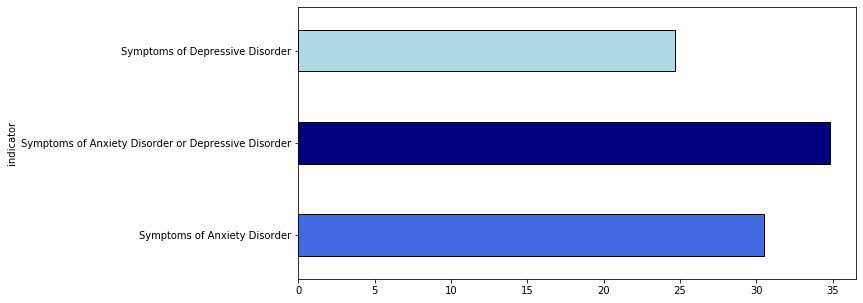

In [113]:
#chart for national average%
final_total= cleaned_all_states.groupby("indicator")["value"].mean()

cleaned_all_states.groupby("indicator")["value"].mean()
final_total = Mo_df.groupby("indicator")["value"].mean()
final_total

final_total.plot(kind="barh",width = (.45),figsize=(10, 5), color=["royalblue","navy","lightblue"],
            edgeColor=('black'), linestyle='-')

## Gender DataFrames

Gender Demographics: *Total of Gender data entries *Total of females *Total of males *The average of each value of week set by gender (could not do by state - group data was only given United States)

In [114]:
#create gender list to pull gender information only
#https://www.youtube.com/watch?v=3Kl5oaT0dP0
genderdata_df = results_df.loc[(results_df["group"] == "By Gender")]
genderdata_df

phase                                          indicator      group  \
8        1                    Symptoms of Depressive Disorder  By Gender   
9        1                    Symptoms of Depressive Disorder  By Gender   
78       1                       Symptoms of Anxiety Disorder  By Gender   
79       1                       Symptoms of Anxiety Disorder  By Gender   
148      1  Symptoms of Anxiety Disorder or Depressive Dis...  By Gender   
149      1  Symptoms of Anxiety Disorder or Depressive Dis...  By Gender   
218      1                    Symptoms of Depressive Disorder  By Gender   
219      1                    Symptoms of Depressive Disorder  By Gender   
288      1                       Symptoms of Anxiety Disorder  By Gender   
289      1                       Symptoms of Anxiety Disorder  By Gender   
358      1  Symptoms of Anxiety Disorder or Depressive Dis...  By Gender   
359      1  Symptoms of Anxiety Disorder or Depressive Dis...  By Gender   
428      1                    Symptoms of Depressive Disorder  By Gender   
429      1                    Symptoms of Depressive Disorder  By Gender   
498      1                       Symptoms of Anxiety Disorder  By Gender   
499      1                       Symptoms of Anxiety Disorder  By Gender   
568      1  Symptoms of Anxiety Disorder or Depressive Dis...  By Gender   
569      1  Symptoms of Anxiety Disorder or Depressive Dis...  By Gender   
638      1                    Symptoms of Depressive Disorder  By Gender   
639      1                    Symptoms of Depressive Disorder  By Gender   
708      1                       Symptoms of Anxiety Disorder  By Gender   
709      1                       Symptoms of Anxiety Disorder  By Gender   
778      1  Symptoms of Anxiety Disorder or Depressive Dis...  By Gender   
779      1  Symptoms of Anxiety Disorder or Depressive Dis...  By Gender   
848      1                    Symptoms of Depressive Disorder  By Gender   
849      1                    Symptoms of Depressive Disorder  By Gender   
918      1                       Symptoms of Anxiety Disorder  By Gender   
919      1                       Symptoms of Anxiety Disorder  By Gender   
988      1  Symptoms of Anxiety Disorder or Depressive Dis...  By Gender   
989      1  Symptoms of Anxiety Disorder or Depressive Dis...  By Gender   
1058     1                    Symptoms of Depressive Disorder  By Gender   
1059     1                    Symptoms of Depressive Disorder  By Gender   
1128     1                       Symptoms of Anxiety Disorder  By Gender   
1129     1                       Symptoms of Anxiety Disorder  By Gender   
1198     1  Symptoms of Anxiety Disorder or Depressive Dis...  By Gender   
1199     1  Symptoms of Anxiety Disorder or Depressive Dis...  By Gender   
1268     1                    Symptoms of Depressive Disorder  By Gender   
1269     1                    Symptoms of Depressive Disorder  By Gender   
1338     1                       Symptoms of Anxiety Disorder  By Gender   
1339     1                       Symptoms of Anxiety Disorder  By Gender   
1408     1  Symptoms of Anxiety Disorder or Depressive Dis...  By Gender   
1409     1  Symptoms of Anxiety Disorder or Depressive Dis...  By Gender   
1478     1                    Symptoms of Depressive Disorder  By Gender   
1479     1                    Symptoms of Depressive Disorder  By Gender   
1548     1                       Symptoms of Anxiety Disorder  By Gender   
1549     1                       Symptoms of Anxiety Disorder  By Gender   
1618     1  Symptoms of Anxiety Disorder or Depressive Dis...  By Gender   
1619     1  Symptoms of Anxiety Disorder or Depressive Dis...  By Gender   
1688     1                    Symptoms of Depressive Disorder  By Gender   
1689     1                    Symptoms of Depressive Disorder  By Gender   
1758     1                       Symptoms of Anxiety Disorder  By Gender   
1759     1                       Symptoms of Anxiety 

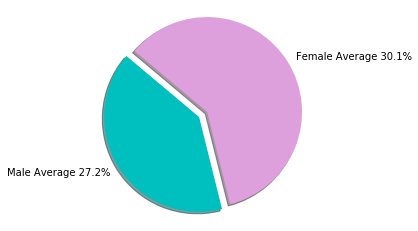

In [115]:
#national percentage M vs F

labels = 'Male Average 27.2%','Female Average 30.1%'
sizes = [40, 60]
colors = ['c','plum']
explode = (0,0.1)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [116]:
genderdata_df.groupby("group").count()

phase  indicator  state  subgroup  time_period  time_period_label  \
group                                                                          
By Gender     58         58     58        58           58                 58   

           value  lowci  highci  confidence_interval  quartile_range  
group                                                                 
By Gender     58     58      58                   58               0

In [117]:
#Create female df
femalegender_df = genderdata_df.loc[(genderdata_df["subgroup"] == "Female")]
femalegender_df.head(3)                                     

phase                                          indicator      group  \
9       1                    Symptoms of Depressive Disorder  By Gender   
79      1                       Symptoms of Anxiety Disorder  By Gender   
149     1  Symptoms of Anxiety Disorder or Depressive Dis...  By Gender   

             state subgroup time_period time_period_label value lowci highci  \
9    United States   Female           1    Apr 23 - May 5  26.1  25.2   27.1   
79   United States   Female           1    Apr 23 - May 5  35.4  34.5   36.3   
149  United States   Female           1    Apr 23 - May 5  40.7  39.7   41.6   

    confidence_interval quartile_range  
9           25.2 - 27.1            NaN  
79          34.5 - 36.3            NaN  
149         39.7 - 41.6            NaN

In [118]:
#how many females
femalegender_df.count()["subgroup"]

29

In [119]:
#Find the average of values for females through each time_period label set so Jessica can graph
femalegender_df['time_period'] = femalegender_df['time_period'].astype(int)
femalegender_df['value']=femalegender_df['value'].astype(float)
femalegender_df.groupby('time_period').mean()

C:\Users\dhire\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\dhire\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


value
time_period           
1            34.066667
2            32.033333
3            32.133333
4            32.733333
5            34.000000
6            34.300000
7            33.600000
8            33.900000
9            35.666667
10           32.800000

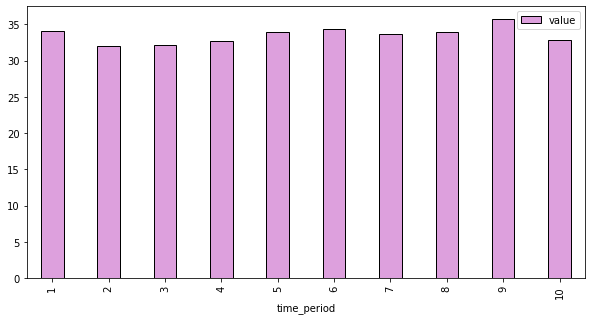

In [121]:
#female weekly average
genderdata_df.groupby("group").count()
fg_df = femalegender_df.groupby('time_period').mean()
fg_df

fg_df.plot(kind="bar",width = (.40),figsize=(10, 5), color="plum", edgeColor=('black'), linestyle='-')

In [122]:
#Create male data only
malegender_df = genderdata_df.loc[(genderdata_df["subgroup"] == "Male")]
malegender_df.head(3) 

phase                                          indicator      group  \
8       1                    Symptoms of Depressive Disorder  By Gender   
78      1                       Symptoms of Anxiety Disorder  By Gender   
148     1  Symptoms of Anxiety Disorder or Depressive Dis...  By Gender   

             state subgroup time_period time_period_label value lowci highci  \
8    United States     Male           1    Apr 23 - May 5  20.8  19.6     22   
78   United States     Male           1    Apr 23 - May 5  26.1  24.7   27.5   
148  United States     Male           1    Apr 23 - May 5    31  29.6   32.3   

    confidence_interval quartile_range  
8           19.6 - 22.0            NaN  
78          24.7 - 27.5            NaN  
148         29.6 - 32.3            NaN

In [123]:
#how many males
malegender_df.count()["subgroup"]
malegender_df.head(3)
malegender_df['time_period'] = malegender_df['time_period'].astype(int)
malegender_df['value']=malegender_df['value'].astype(float)
malegender_df.groupby('time_period').mean()

C:\Users\dhire\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\dhire\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


value
time_period           
1            25.966667
2            26.800000
3            25.400000
4            26.133333
5            26.700000
6            27.466667
7            28.033333
8            27.866667
9            29.266667
10           28.650000

In [94]:
malegender_df['time_period'] = malegender_df['time_period'].astype(int)
malegender_df['value']=malegender_df['value'].astype(float)
malegender_df.groupby('time_period').mean()

C:\Users\dhire\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\dhire\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


value
time_period           
1            25.966667
2            26.800000
3            25.400000
4            26.133333
5            26.700000
6            27.466667
7            28.033333
8            27.866667
9            29.266667
10           28.650000

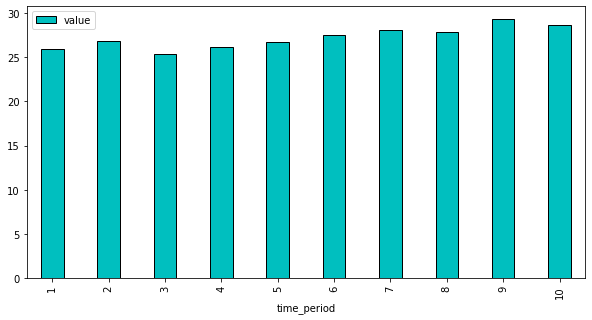

In [124]:
# chart for male weekly percentage
genderdata_df.groupby("group").count()
mg_df = malegender_df.groupby('time_period').mean()
mg_df

mg_df.plot(kind="bar",width = (.40),figsize=(10, 5), color="c", edgeColor=('black'), linestyle='-')


## Race DataFrames and plots

In [95]:
race_df = results_df.loc[results_df["group"] == "By Race/Hispanic ethnicity", :]
race_df

phase                                          indicator  \
10       1                    Symptoms of Depressive Disorder   
11       1                    Symptoms of Depressive Disorder   
12       1                    Symptoms of Depressive Disorder   
13       1                    Symptoms of Depressive Disorder   
14       1                    Symptoms of Depressive Disorder   
80       1                       Symptoms of Anxiety Disorder   
81       1                       Symptoms of Anxiety Disorder   
82       1                       Symptoms of Anxiety Disorder   
83       1                       Symptoms of Anxiety Disorder   
84       1                       Symptoms of Anxiety Disorder   
150      1  Symptoms of Anxiety Disorder or Depressive Dis...   
151      1  Symptoms of Anxiety Disorder or Depressive Dis...   
152      1  Symptoms of Anxiety Disorder or Depressive Dis...   
153      1  Symptoms of Anxiety Disorder or Depressive Dis...   
154      1  Symptoms of Anxiety Disorder or Depressive Dis...   
220      1                    Symptoms of Depressive Disorder   
221      1                    Symptoms of Depressive Disorder   
222      1                    Symptoms of Depressive Disorder   
223      1                    Symptoms of Depressive Disorder   
224      1                    Symptoms of Depressive Disorder   
290      1                       Symptoms of Anxiety Disorder   
291      1                       Symptoms of Anxiety Disorder   
292      1                       Symptoms of Anxiety Disorder   
293      1                       Symptoms of Anxiety Disorder   
294      1                       Symptoms of Anxiety Disorder   
360      1  Symptoms of Anxiety Disorder or Depressive Dis...   
361      1  Symptoms of Anxiety Disorder or Depressive Dis...   
362      1  Symptoms of Anxiety Disorder or Depressive Dis...   
363      1  Symptoms of Anxiety Disorder or Depressive Dis...   
364      1  Symptoms of Anxiety Disorder or Depressive Dis...   
430      1                    Symptoms of Depressive Disorder   
431      1                    Symptoms of Depressive Disorder   
432      1                    Symptoms of Depressive Disorder   
433      1                    Symptoms of Depressive Disorder   
434      1                    Symptoms of Depressive Disorder   
500      1                       Symptoms of Anxiety Disorder   
501      1                       Symptoms of Anxiety Disorder   
502      1                       Symptoms of Anxiety Disorder   
503      1                       Symptoms of Anxiety Disorder   
504      1                       Symptoms of Anxiety Disorder   
570      1  Symptoms of Anxiety Disorder or Depressive Dis...   
571      1  Symptoms of Anxiety Disorder or Depressive Dis...   
572      1  Symptoms of Anxiety Disorder or Depressive Dis...   
573      1  Symptoms of Anxiety Disorder or Depressive Dis...   
574      1  Symptoms of Anxiety Disorder or Depressive Dis...   
640      1                    Symptoms of Depressive Disorder   
641      1                    Symptoms of Depressive Disorder   
642      1                    Symptoms of Depressive Disorder   
643      1                    Symptoms of Depressive Disorder   
644      1                    Symptoms of Depressive Disorder   
710      1                       Symptoms of Anxiety Disorder   
711      1                       Symptoms of Anxiety Disorder   
712      1                       Symptoms of Anxiety Disorder   
713      1                       Symptoms of Anxiety Disorder   
714      1                       Symptoms of Anxiety Disorder   
780      1  Symptoms of Anxiety Disorder or Depressive Dis...   
781      1  Symptoms of Anxiety Disorder or Depressive Dis...   
782      1  Symptoms of Anxiety Disorder or Depressive Dis...   
783      1  Symptoms of Anxiety Disorder or Depressive Dis...   
784      1  Symptoms of Anxiety Disorder or Depressive Dis...   
850      1                    Symptoms o

In [96]:
race_df['value']=race_df['value'].astype(float)
race_mean = race_df.groupby("subgroup").mean()
race_mean

C:\Users\dhire\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


value
subgroup                                               
Hispanic or Latino                            35.027586
Non-Hispanic Asian, single race               25.434483
Non-Hispanic black, single race               33.500000
Non-Hispanic white, single race               28.641379
Non-Hispanic, other races and multiple races  39.172414

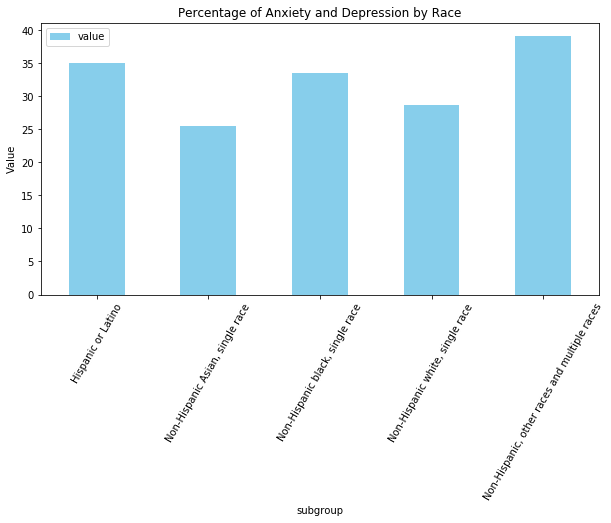

<Figure size 432x288 with 0 Axes>

In [97]:
# Use DataFrame.plot() in order to create a bar chart of the data
race_mean.plot(kind="bar", color = "skyblue", figsize=(10,5))
plt.xticks(rotation=60)
# Set a title for the chart
plt.title("Percentage of Anxiety and Depression by Race")
plt.ylabel("Value")
plt.show()
plt.tight_layout()

In [98]:
race_df['value']=race_df['value'].astype(float)
race_value = race_df.groupby("subgroup")
race_value.head()

C:\Users\dhire\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


phase                                          indicator  \
10      1                    Symptoms of Depressive Disorder   
11      1                    Symptoms of Depressive Disorder   
12      1                    Symptoms of Depressive Disorder   
13      1                    Symptoms of Depressive Disorder   
14      1                    Symptoms of Depressive Disorder   
80      1                       Symptoms of Anxiety Disorder   
81      1                       Symptoms of Anxiety Disorder   
82      1                       Symptoms of Anxiety Disorder   
83      1                       Symptoms of Anxiety Disorder   
84      1                       Symptoms of Anxiety Disorder   
150     1  Symptoms of Anxiety Disorder or Depressive Dis...   
151     1  Symptoms of Anxiety Disorder or Depressive Dis...   
152     1  Symptoms of Anxiety Disorder or Depressive Dis...   
153     1  Symptoms of Anxiety Disorder or Depressive Dis...   
154     1  Symptoms of Anxiety Disorder or Depressive Dis...   
220     1                    Symptoms of Depressive Disorder   
221     1                    Symptoms of Depressive Disorder   
222     1                    Symptoms of Depressive Disorder   
223     1                    Symptoms of Depressive Disorder   
224     1                    Symptoms of Depressive Disorder   
290     1                       Symptoms of Anxiety Disorder   
291     1                       Symptoms of Anxiety Disorder   
292     1                       Symptoms of Anxiety Disorder   
293     1                       Symptoms of Anxiety Disorder   
294     1                       Symptoms of Anxiety Disorder   

                          group          state  \
10   By Race/Hispanic ethnicity  United States   
11   By Race/Hispanic ethnicity  United States   
12   By Race/Hispanic ethnicity  United States   
13   By Race/Hispanic ethnicity  United States   
14   By Race/Hispanic ethnicity  United States   
80   By Race/Hispanic ethnicity  United States   
81   By Race/Hispanic ethnicity  United States   
82   By Race/Hispanic ethnicity  United States   
83   By Race/Hispanic ethnicity  United States   
84   By Race/Hispanic ethnicity  United States   
150  By Race/Hispanic ethnicity  United States   
151  By Race/Hispanic ethnicity  United States   
152  By Race/Hispanic ethnicity  United States   
153  By Race/Hispanic ethnicity  United States   
154  By Race/Hispanic ethnicity  United States   
220  By Race/Hispanic ethnicity  United States   
221  By Race/Hispanic ethnicity  United States   
222  By Race/Hispanic ethnicity  United States   
223  By Race/Hispanic ethnicity  United States   
224  By Race/Hispanic ethnicity  United States   
290  By Race/Hispanic ethnicity  United States   
291  By Race/Hispanic ethnicity  United States   
292  By Race/Hispanic ethnicity  United States   
293  By Race/Hispanic ethnicity  United States   
294  By Race/Hispanic ethnicity  United States   

                                         subgroup time_period  \
10                             Hispanic or Latino           1   
11                Non-Hispanic white, single race           1   
12                Non-Hispanic black, single race           1   
13                Non-Hispanic Asian, single race           1   
14   Non-Hispanic, other races and multiple races           1   
80                             Hispanic or Latino           1   
81                Non-Hispanic white, single race           1   
82                Non-Hispanic black, single race           1   
83                Non-Hispanic Asian, single race           1   
84   Non-Hispanic, other races and multiple races           1   
150                            Hispanic or Latino           1   
151               Non-Hispanic white, single race           1   
152               Non-Hispanic black, single race           1   
153               Non-Hispanic Asian, single race           1   
154  Non-Hispanic, other races and multiple races           1  

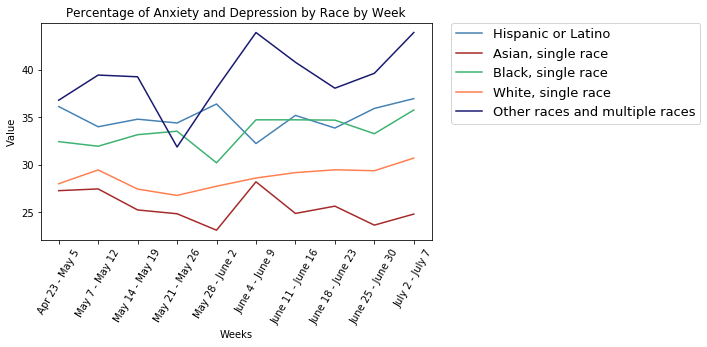

In [100]:
figure(num=None, figsize=(7, 4))
plt.xticks(rotation=60)

# Create a list of the weeks that we will use as x axis
weeks = ["Apr 23 - May 5","May 7 - May 12","May 14 - May 19","May 21 - May 26","May 28 - June 2",
         "June 4 - June 9","June 11 - June 16","June 18 - June 23","June 25 - June 30","July 2 - July 7"]

hispanic_latino = race_df.loc[race_df["subgroup"] == "Hispanic or Latino"]
hispanic_latino_week = hispanic_latino.groupby("time_period").mean()["value"]

asian = race_df.loc[race_df["subgroup"] == "Non-Hispanic Asian, single race"]
asian_week = asian.groupby("time_period").mean()["value"]

black = race_df.loc[race_df["subgroup"] == "Non-Hispanic black, single race"]
black_week = black.groupby("time_period").mean()["value"]

white = race_df.loc[race_df["subgroup"] == "Non-Hispanic white, single race"]
white_week = white.groupby("time_period").mean()["value"]

other = race_df.loc[race_df["subgroup"] == "Non-Hispanic, other races and multiple races"]
other_week = other.groupby("time_period").mean()["value"]

# Plot the line chart
plt.plot(weeks, hispanic_latino_week, "steelblue", label="Hispanic or Latino")
plt.plot(weeks, asian_week, "brown", label="Asian, single race")
plt.plot(weeks, black_week, "mediumseagreen", label="Black, single race")
plt.plot(weeks, white_week, "coral", label="White, single race")
plt.plot(weeks, other_week, "midnightblue", label="Other races and multiple races")

# Place a legend outside of the chart
#https://qiita.com/matsui-k20xx/items/291400ed56a39ed63462
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=13)

plt.xlabel("Weeks")
plt.ylabel("Value")
plt.title("Percentage of Anxiety and Depression by Race by Week")

# Show the chart
plt.show()